<a href="https://colab.research.google.com/github/pragatipatel26/Predictive-Analytics-and-Readmission-Analysis-for-Diabetes-Management/blob/main/Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import io
import numpy as np

# Upload the dataset
uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))

Saving diabetes (1).csv to diabetes (1).csv


In [ ]:
#FIRST PART== EDA
#Basic Info
df.head()
df.tail()
df.shape
df.columns
df.info()
df.describe()

#Missing Values
df.isnull().sum()
df.isnull().mean()*100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


,0
Pregnancies,0.000000
Glucose,0.651042
BloodPressure,4.557292
SkinThickness,29.557292
Insulin,48.697917
BMI,1.432292
DiabetesPedigreeFunction,0.000000
Age,0.000000
Outcome,0.000000


<Axes: >

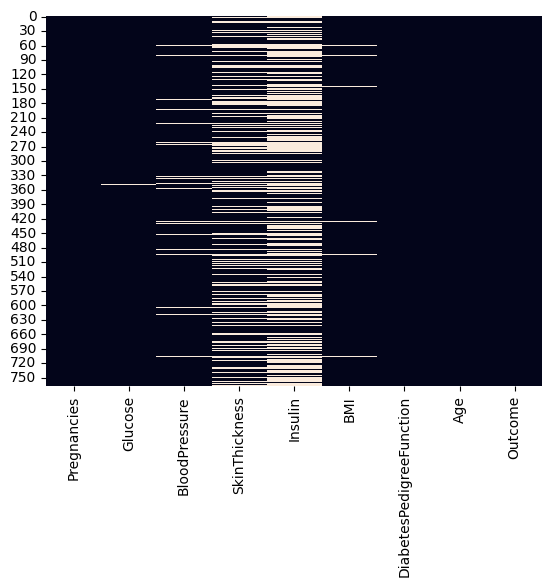

In [ ]:
#Heatmap of missing values
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
#Replacing 0 with NaN
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)


In [ ]:
#SECOND PART== Using a KNN approach to fill in for the missing values - (it can be much better)
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# 'df'is our DataFrame with these columns specified
columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

#Standardizing the data
scaler = StandardScaler()
scaler.fit(df[columns])
df_scaled = scaler.transform(df[columns])

#Converting the df_scaled object back into DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=columns)

# Imputing missing values using KNN
imputer = KNNImputer(n_neighbors=5)  # Using 5 neighbors for simplicity
df_scaled_imputed = imputer.fit_transform(df_scaled)
df_scaled_imputed = pd.DataFrame(df_scaled_imputed, columns=columns)
df.update(df_scaled_imputed)

In [ ]:
#THIRD PART== Preprocess the dataset - encode the output as -1 or 1, and standardize the input features - train a logistic regression model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Encodeing the Outcome as -1 and 1
df['Outcome'] = df['Outcome'].replace({0:-1,1:1})

#Standardizing the Input Features (excluding 'Outcome')
features=df.columns.drop('Outcome')
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Spliting the data into training and testing sets
X_train,X_test,Y_train,Y_test=train_test_split(df[features],df['Outcome'],test_size=0.3,random_state=42)



In [ ]:
#FOURTH PART== Trainnig Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

class_weights={-1:1,1:1}
log_reg_model=LogisticRegression(class_weight=class_weights,random_state=42)
log_reg_model.fit(X_train,Y_train)

#Evaluating the Model
Y_pred_log_reg=log_reg_model.predict(X_test)
accuracy_log_reg = accuracy_score(Y_test, Y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(Y_test, Y_pred_log_reg)

#Printing the model accuracy and the confusion matrix
print("Accuracy of the Logistic Regression model:", accuracy_log_reg)
print("Confusion Matrix:\n", conf_matrix_log_reg)

Accuracy of the Logistic Regression model: 0.7402597402597403
Confusion Matrix:
 [[124  27]
 [ 33  47]]


In [ ]:
#FIFTH PART==Training Random forest model with balanced class weight
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 200, class_weight=class_weights,random_state=42)
rf_model.fit(X_train, Y_train)

#Evaluating the Model
Y_pred_rf=rf_model.predict(X_test)
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)

#Printing the model accuracy and the confusion matrix
print("Accuracy of the Random Forest model:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

Accuracy of the Random Forest model: 0.7316017316017316
Confusion Matrix:
 [[116  35]
 [ 27  53]]


In [ ]:
#Classification Reports for both Models
from sklearn.metrics import classification_report

# For Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(Y_test, Y_pred_log_reg))

# For Random Forest
print("Random Forest Classification Report:")
print(classification_report(Y_test, Y_pred_rf))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

          -1       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231

Random Forest Classification Report:
              precision    recall  f1-score   support

          -1       0.81      0.77      0.79       151
           1       0.60      0.66      0.63        80

    accuracy                           0.73       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.73      0.73       231



Accuracy: 0.7402597402597403
Confusion Matrix:
 [[124  27]
 [ 33  47]]
Precision: 0.6351351351351351
Recall: 0.5875
ROC AUC: 0.7943708609271523


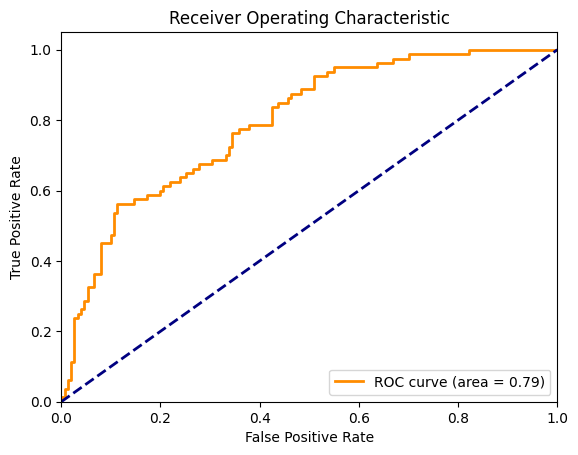

                          Coefficient
Glucose                      1.145976
BMI                          0.628092
Age                          0.362966
Pregnancies                  0.201554
SkinThickness                0.131430
DiabetesPedigreeFunction     0.105604
Insulin                      0.040359
BloodPressure               -0.071582


In [ ]:
#Reporting accuracy, confusion matrix, precision, recall, ROC
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#Calculating precision and recall
precision = precision_score(Y_test, Y_pred_log_reg)
recall = recall_score(Y_test, Y_pred_log_reg)

#Calculating ROC AUC
fpr, tpr, thresholds = roc_curve(Y_test, log_reg_model.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(Y_test, log_reg_model.predict_proba(X_test)[:, 1])

#Displaying all metrics
print("Accuracy:", accuracy_log_reg)
print("Confusion Matrix:\n", conf_matrix_log_reg)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)

#Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



#identifying how variables affect the outcome
# Getting the coefficients of the features
feature_importance = pd.DataFrame(log_reg_model.coef_[0], index=features, columns=['Coefficient'])
print(feature_importance.sort_values(by='Coefficient', ascending=False))

Testing Class Weights: {-1: 1, 1: 1}
Accuracy: 0.74
Precision: 0.64
Recall: 0.59
ROC AUC: 0.79
------------------------------
Testing Class Weights: {-1: 1, 1: 2}
Accuracy: 0.70
Precision: 0.55
Recall: 0.68
ROC AUC: 0.80
------------------------------
Testing Class Weights: {-1: 1, 1: 3}
Accuracy: 0.66
Precision: 0.50
Recall: 0.79
ROC AUC: 0.80
------------------------------
Testing Class Weights: {-1: 2, 1: 1}
Accuracy: 0.75
Precision: 0.72
Recall: 0.45
ROC AUC: 0.79
------------------------------
Feature Importance:
                          Coefficient
Glucose                      1.137051
BMI                          0.624296
Age                          0.319385
Pregnancies                  0.179721
SkinThickness                0.123074
DiabetesPedigreeFunction     0.049513
Insulin                      0.020237
BloodPressure               -0.064018


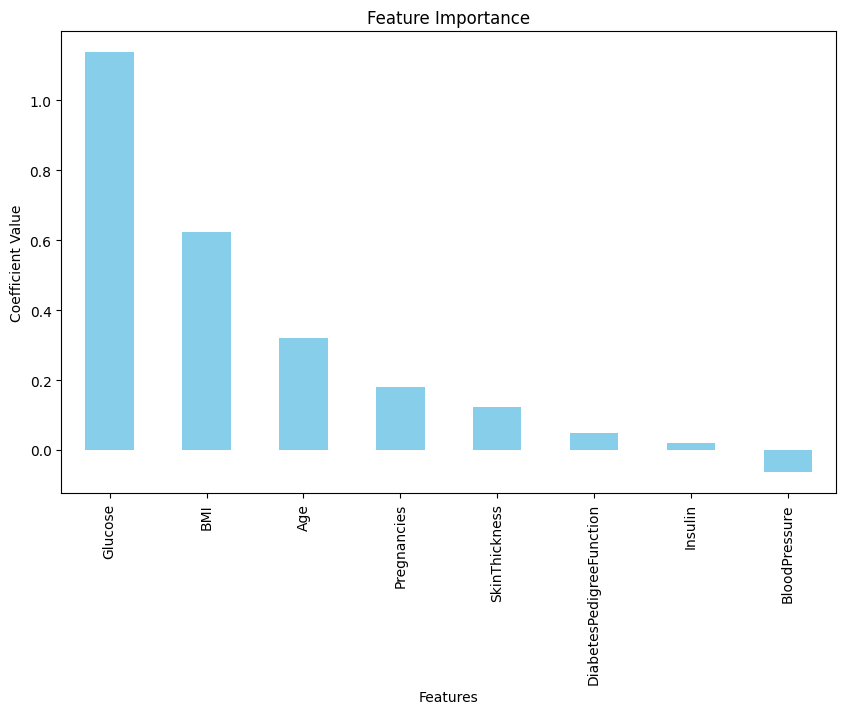

In [ ]:
#Change in reults in logistic regression model on changing the class weights
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

# List of class weight configurations
class_weights_list = [
    {-1: 1, 1: 1},    # Default (balanced weights)
    {-1: 1, 1: 2},    # Higher weight for positive class
    {-1: 1, 1: 3},    # Even higher weight for positive class
    {-1: 2, 1: 1},    # Higher weight for negative class
]

# Iterating through each class weight configuration
for weights in class_weights_list:
    print(f"Testing Class Weights: {weights}")

    # Initializinge and training the Logistic Regression model
    model = LogisticRegression(class_weight=weights, solver='liblinear')
    model.fit(X_train, Y_train)

    # Making predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculating metrics
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    roc_auc = roc_auc_score(Y_test, y_proba)

    # Printing metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print("-" * 30)

# Analyzing feature importance for the last trained model
feature_importance = pd.DataFrame(model.coef_[0], index=X_train.columns, columns=['Coefficient'])
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Displaying and visualizing feature importance
print("Feature Importance:")
print(feature_importance)
feature_importance.plot(kind='bar', figsize=(10, 6), legend=False, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

